In [41]:
from qiskit import QuantumRegister, ClassicalRegister, Aer, execute, QuantumCircuit
from qiskit.tools.visualization import plot_histogram

In [42]:
import math

In [43]:
S_simulator = Aer.get_backend(name='statevector_simulator')
Q_simulator = Aer.get_backend(name='qasm_simulator')

# Experiment

## Alice wants to teleport her qbit to Bob, qbit_0 holds source info and belongs to Alice, qbit_1 also belongs to Alice and used for teleportation, qbit_2 is target bit, we want to teleport the info to and belongs to Bob

In [44]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

# Circuit

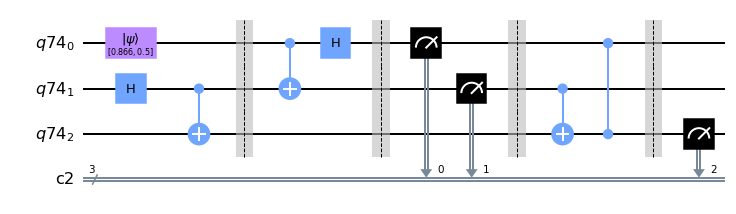

In [66]:
ckt = QuantumCircuit(q,c)

# init source q0
ckt.initialize([math.sqrt(3)/2, 1/2], 0) 
# measure source q0 to c3
# ckt.measure(q[0], c[3])

# entangle q1 and q2
ckt.h(q[1])
ckt.cx(q[1], q[2])
ckt.barrier()

# CNOT q0 and q1
ckt.cx(q[0], q[1])
# change q0 basis
ckt.h(q[0])
ckt.barrier()

# measure q0 and q1 to c0 and c1
ckt.measure([q[0], q[1]], [c[0], c[1]])
ckt.barrier()

# measurement based operation to get source info to q2
ckt.cx(q[1], q[2])
ckt.cz(q[0], q[2])

ckt.barrier()
# measure target bit
ckt.measure(q[2], c[2])

ckt.draw(output = "mpl")

# Here measurement of c3 is source info and c2 is target info, which we claim to be same, for any wave function of q0

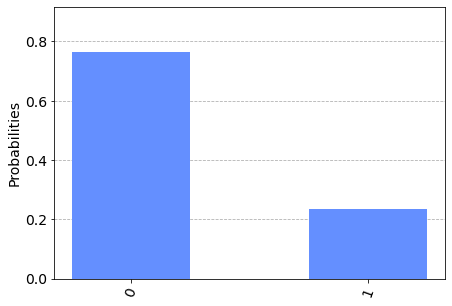

In [65]:
# Execute the circuit
ex = execute(ckt, Q_simulator, shots = 1024)
res = ex.result()
bars = res.get_counts(ckt)

# visualization
# we are interested in c3 c2 only
filtered_list = [[k[0], v] for k, v in bars.items()]
newbars={}

for k, v in filtered_list:
    newbars[k] = newbars.get(k, 0) + v
        
# Plot the results
plot_histogram(newbars, bar_labels=False)

## Conclusions

## So our q0 wave function is consistent with measurements of q2